<a href="https://colab.research.google.com/github/HeshanDissanayake/Convolutional_Auto_encoder/blob/main/Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
!kaggle datasets

In [ ]:
!kaggle -h

In [ ]:
!unzip lfwpeople.zip

Archive:  lfwpeople.zip
  inflating: lfw-funneled.tgz        
  inflating: pairs.txt               
  inflating: pairsDevTest.txt        
  inflating: pairsDevTrain.txt       


In [ ]:
!tar zxvf lfw-funneled.tgz

In [ ]:
!mkdir Faces
!mkdir Faces/faces

In [ ]:
for (root, dirs, files) in os.walk('/content/lfw_funneled',topdown=True):
  for file in files:
    if file.endswith('.jpg'):
      os.system('sudo p %s/%s /content/Faces/faces/%s'%(root,file,file))


  

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, add, Dropout, Flatten, Dense, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import resize, rescale


In [ ]:
def combine_generator(gen1, gen2):
    while True:
        yield(next(gen1), next(gen2))

In [ ]:
color_datagen = ImageDataGenerator(rescale=1/255)
bw_datagen = ImageDataGenerator(rescale=1/255)

color_generator = color_datagen.flow_from_directory(directory='/content/Faces/', class_mode= None , shuffle=False, seed =1,batch_size=33)
bw_generator = bw_datagen.flow_from_directory(directory='/content/Faces/', class_mode= None , shuffle=False, color_mode ='grayscale'
                 ,batch_size=33, seed =1 )

traingen = combine_generator(bw_generator, color_generator)

Found 13233 images belonging to 1 classes.
Found 13233 images belonging to 1 classes.


In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
traingen =  datagen.flow_from_directory(directory='/content/Faces/', class_mode= 'input' , shuffle=False)

Found 13233 images belonging to 1 classes.


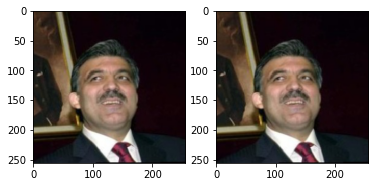

In [ ]:

for batch in traingen:
  
  plt.subplot(1,2,1)
  plt.imshow(batch[0][0,:,:,:])

  plt.subplot(1,2,2)
  plt.imshow(batch[1][0,:,:,:])
  plt.show()
  break

In [ ]:
input_layer = Input(shape = (256, 256, 1))
l1 = Conv2D(64, (3,3), activation='relu', padding='same',activity_regularizer=regularizers.l1(10e-10))(input_layer)
l2 = Conv2D(64, (3,3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(l1)
l2 = Dropout(0.3)(l2)

l3 = MaxPooling2D((2,2))(l2)
l4 = Conv2D(128, (3,3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(l3)
l5 = Conv2D(128, (3,3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(l4)
l6 = MaxPooling2D((2,2))(l5)
l7 = Conv2D(256, (3,3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(l6)

encoder = Model(input_layer, l7)
encoder.summary()




In [ ]:
l8 = UpSampling2D()(l7)
l9  = Conv2D(128, (3,3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(l8)
l10 = Conv2D(128, (3,3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(l9)
l11 = add([l10, l5]) 
l12 = UpSampling2D()(l11)

l13 = Conv2D(64, (3,3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(l12)
l14 = Conv2D(64, (3,3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(l13)
l15 = add([l14,l2])
l16 = Conv2D(3, (3,3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(l15)
auto_encoder = Model(input_layer, l16)
auto_encoder.summary()

In [ ]:
auto_encoder.compile(optimizer = "adadelta", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history = auto_encoder.fit(traingen, epochs=200 , steps_per_epoch=400)

Epoch 1/200


ResourceExhaustedError: ignored

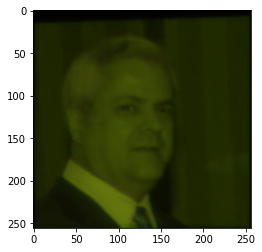

In [ ]:
 for batch in traingen:
  img = auto_encoder.predict(batch[0])
  plt.imshow(img[0])
  plt.show()
  break

In [ ]:

dirs = ['/content/dildo.jpg', '/content/me.jpg', '/content/aaasdasdaa.jpeg',
        '/content/chanuk.jpg', '/content/rashen.jpg']

plt.figure(figsize=(100, 100))
i = 0

for dir in dirs:

  img = resize(plt.imread(dir),(256,256,3))
  img = img.reshape(1,256,256,3)


  i += 1
  ax = plt.subplot(5, 3, i)
  plt.imshow(img[0,:,:,:])

  encode = encoder.predict(img.reshape((1,256,256,3)))
  i += 1
  ax = plt.subplot(5, 3, i)
  plt.imshow(encode.reshape(25,20))

  i += 1
  predicted = auto_encoder.predict(img)
  ax = plt.subplot(5, 3, i)
  plt.imshow(predicted[0,:,:,:])





In [ ]:
for img in val:
  img.shape
  break